##### Project: NLP - Sentiment Analysis
##### Dataset: IMDB Movie Reviews (from keras)
#####  Step 1: Import Libraries 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

#####  Step 2: Load Dataset 
##### Load IMDB dataset (num_words=10000 keeps top 10k words)

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

##### TODO: Check length of reviews, apply padding/truncating

In [5]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

#####  Step 3: Explore Dataset 
##### TODO: Print sample review and its label

In [6]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\night\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


##### Step 4: Build LSTM Model 

In [7]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate LSTM
score = model.evaluate(X_test, y_test, verbose=0)
print("LSTM Test Loss:", score[0])
print("LSTM Test Accuracy:", score[1])

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.7739 - loss: 0.4647 - val_accuracy: 0.8596 - val_loss: 0.3522
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.8936 - loss: 0.2761 - val_accuracy: 0.8740 - val_loss: 0.3380
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 82ms/step - accuracy: 0.9171 - loss: 0.2211 - val_accuracy: 0.8744 - val_loss: 0.3217
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9357 - loss: 0.1789 - val_accuracy: 0.8692 - val_loss: 0.4076
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 83ms/step - accuracy: 0.9460 - loss: 0.1520 - val_accuracy: 0.8724 - val_loss: 0.3648
LSTM Test Loss: 0.38364675641059875
LSTM Test Accuracy: 0.8629599809646606


##### Step 5: Evaluate the LSTM Model 
##### TODO: Evaluate model on test data


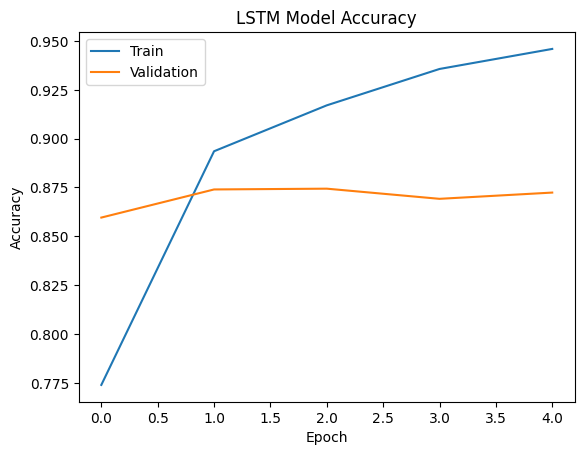

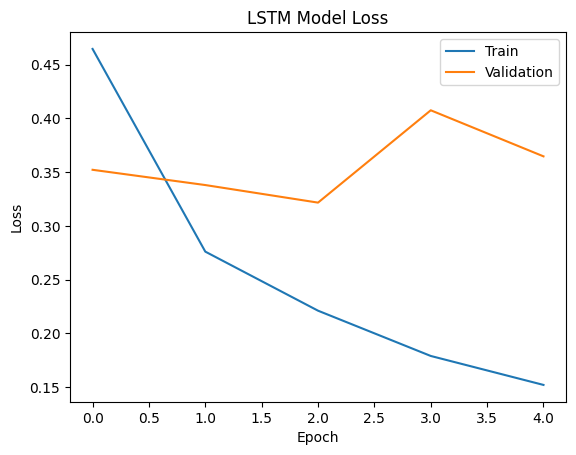

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("LSTM Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

# ------------------------------------------------------------

### NLP Preprocessing on Sample Text 


#####  Download nltk data

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to C:\Users\night/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\night/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\night/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\night/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\night/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

##### Sample text data

In [10]:
sample_texts = [
"I loved the movie! It was fantastic and thrilling.",
"The film was boring and too long. I did not enjoy it.",
"An average movie with some good moments but overall mediocre."
]

##### TODO: Initialize stemmer and stopwords

In [11]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [12]:
for i, text in enumerate(sample_texts):
    print(f"\nOriginal Text {i+1}:", text)
    
    # Tokenization
    words = word_tokenize(text)
    print("Tokens:", words)
    
    # Lowercase + Remove stopwords
    words_cleaned = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
    print("Cleaned Tokens:", words_cleaned)
    
    # Stemming
    stemmed_words = [stemmer.stem(w) for w in words_cleaned]
    print("Stemmed Tokens:", stemmed_words)
    
    # Part-of-Speech tagging (Parsing)
    pos_tags = nltk.pos_tag(words_cleaned)
    print("POS Tags:", pos_tags)


Original Text 1: I loved the movie! It was fantastic and thrilling.
Tokens: ['I', 'loved', 'the', 'movie', '!', 'It', 'was', 'fantastic', 'and', 'thrilling', '.']
Cleaned Tokens: ['loved', 'movie', 'fantastic', 'thrilling']
Stemmed Tokens: ['love', 'movi', 'fantast', 'thrill']
POS Tags: [('loved', 'VBN'), ('movie', 'NN'), ('fantastic', 'JJ'), ('thrilling', 'NN')]

Original Text 2: The film was boring and too long. I did not enjoy it.
Tokens: ['The', 'film', 'was', 'boring', 'and', 'too', 'long', '.', 'I', 'did', 'not', 'enjoy', 'it', '.']
Cleaned Tokens: ['film', 'boring', 'long', 'enjoy']
Stemmed Tokens: ['film', 'bore', 'long', 'enjoy']
POS Tags: [('film', 'NN'), ('boring', 'VBG'), ('long', 'RB'), ('enjoy', 'VB')]

Original Text 3: An average movie with some good moments but overall mediocre.
Tokens: ['An', 'average', 'movie', 'with', 'some', 'good', 'moments', 'but', 'overall', 'mediocre', '.']
Cleaned Tokens: ['average', 'movie', 'good', 'moments', 'overall', 'mediocre']
Stemmed T

In [13]:
model.save("model.h5")


In [14]:
# Evaluate on test data
loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)

# Check some predictions
for i in range(5):
    print("Review:", y_test[i])
    print("Prediction:", model.predict(np.array([X_test[i]]))[0][0])


782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.8630 - loss: 0.3836
Test accuracy: 0.8629599809646606
Review: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Prediction: 0.07270353
Review: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: 0.99534225
Review: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: 0.9388373
Review: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: 0.69670045
Review: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: 0.9983074
